In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math

In [2]:
os.chdir("/Users/sakshikumar/Documents/UCD/03. WQ 2025/452 ML/Project")

In [3]:
okcupid = pd.read_csv('okcupid_profiles.csv')
okcupid.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [4]:
okcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [5]:
okcupid.describe(include='all')

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
count,59946.000000,59946,59946,59946,54650,35551,56961,45866,53318,54266,...,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343
unique,NaN,5,2,3,12,18,6,3,32,217,...,54347,51516,48625,43520,49257,48961,43583,45548,39323,45440
top,NaN,single,m,straight,average,mostly anything,socially,never,graduated from college/university,white,...,.,enjoying it.,listening,my smile,ask me,family,my future,out with friends,ask me,you want to.
freq,NaN,55697,35829,51606,14652,16585,41780,37724,23959,32831,...,12,61,82,529,16,6,161,89,45,200
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(okcupid.columns)
len(okcupid.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')


31

#### Just features

In [7]:
okc_features = okcupid[okcupid.columns[:-10]]
okc_features.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english


#### Duplicates

In [8]:
dups = okc_features.drop_duplicates()
dups.shape == okc_features.shape            # No duplicates

True

#### Missing values

In [9]:
# print(okcupid.isna().sum().sort_values(ascending=False))
print(okc_features.isna().sum().sort_values(ascending=False))

offspring      35561
diet           24395
religion       20226
pets           19921
drugs          14080
sign           11056
job             8198
education       6628
ethnicity       5680
smokes          5512
body_type       5296
drinks          2985
speaks            50
height             3
location           0
last_online        0
income             0
status             0
orientation        0
sex                0
age                0
dtype: int64


In [10]:
cols = okc_features.columns
isna = []

for x in okc_features.columns:
    isna.append((okc_features[x].isna().sum()/len(okc_features[x])*100).round(0))

df = pd.DataFrame({'Columns': cols, 'Percentage of missing values': isna})
df = df.sort_values(by='Percentage of missing values', ascending=False)
df

,Columns,Percentage of missing values
15,offspring,59.0
5,diet,41.0
17,religion,34.0
16,pets,33.0
7,drugs,23.0
18,sign,18.0
12,job,14.0
8,education,11.0
19,smokes,9.0
4,body_type,9.0


In [ ]:
object_cols = okc_features.select_dtypes(include=['object'])
object_cols.head()
# fig, axes = plt.subplots(1, len(okc_features), figsize=(5 * len(okc_features), 5))

# for i, column in enumerate(okc_features.columns):
#     axes[i].bar(object_cols[column].value_counts().index, object_cols[column].value_counts().values)
# plt.tight_layout()
# plt.show()

object_cols.iloc[:, :10].apply(lambda x: x.value_counts().nlargest(10)).plot(kind='bar', subplots=True, figsize=(20, 15))
plt.tight_layout()
plt.show()

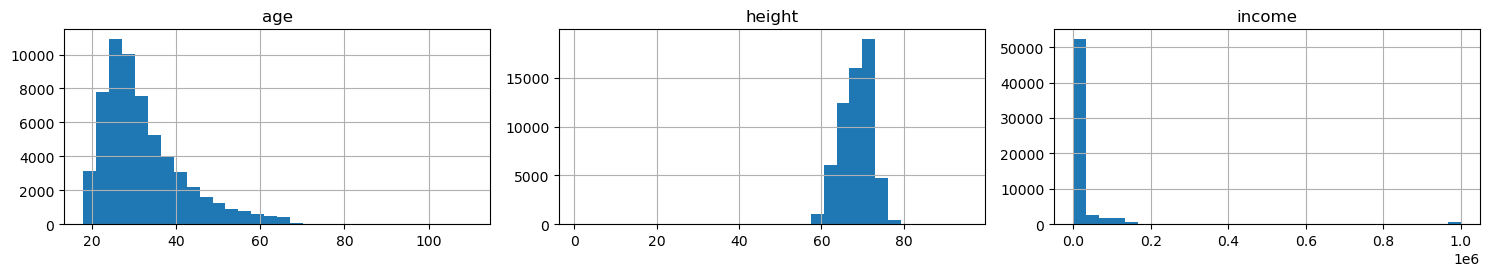

In [14]:
numeric_cols = okc_features.select_dtypes(include=['number'])
numeric_cols.hist(figsize=(15, 10), bins=30, layout=(4, 3))  
plt.tight_layout()
plt.show()

/var/folders/sn/h7vck5zj3nd4j5p9qgfsvyh40000gn/T/ipykernel_73350/663144138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette="muted")
/var/folders/sn/h7vck5zj3nd4j5p9qgfsvyh40000gn/T/ipykernel_73350/663144138.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(value_counts.index, rotation=45)
/var/folders/sn/h7vck5zj3nd4j5p9qgfsvyh40000gn/T/ipykernel_73350/663144138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette="muted")
/var/folders/sn/h7vck5zj3

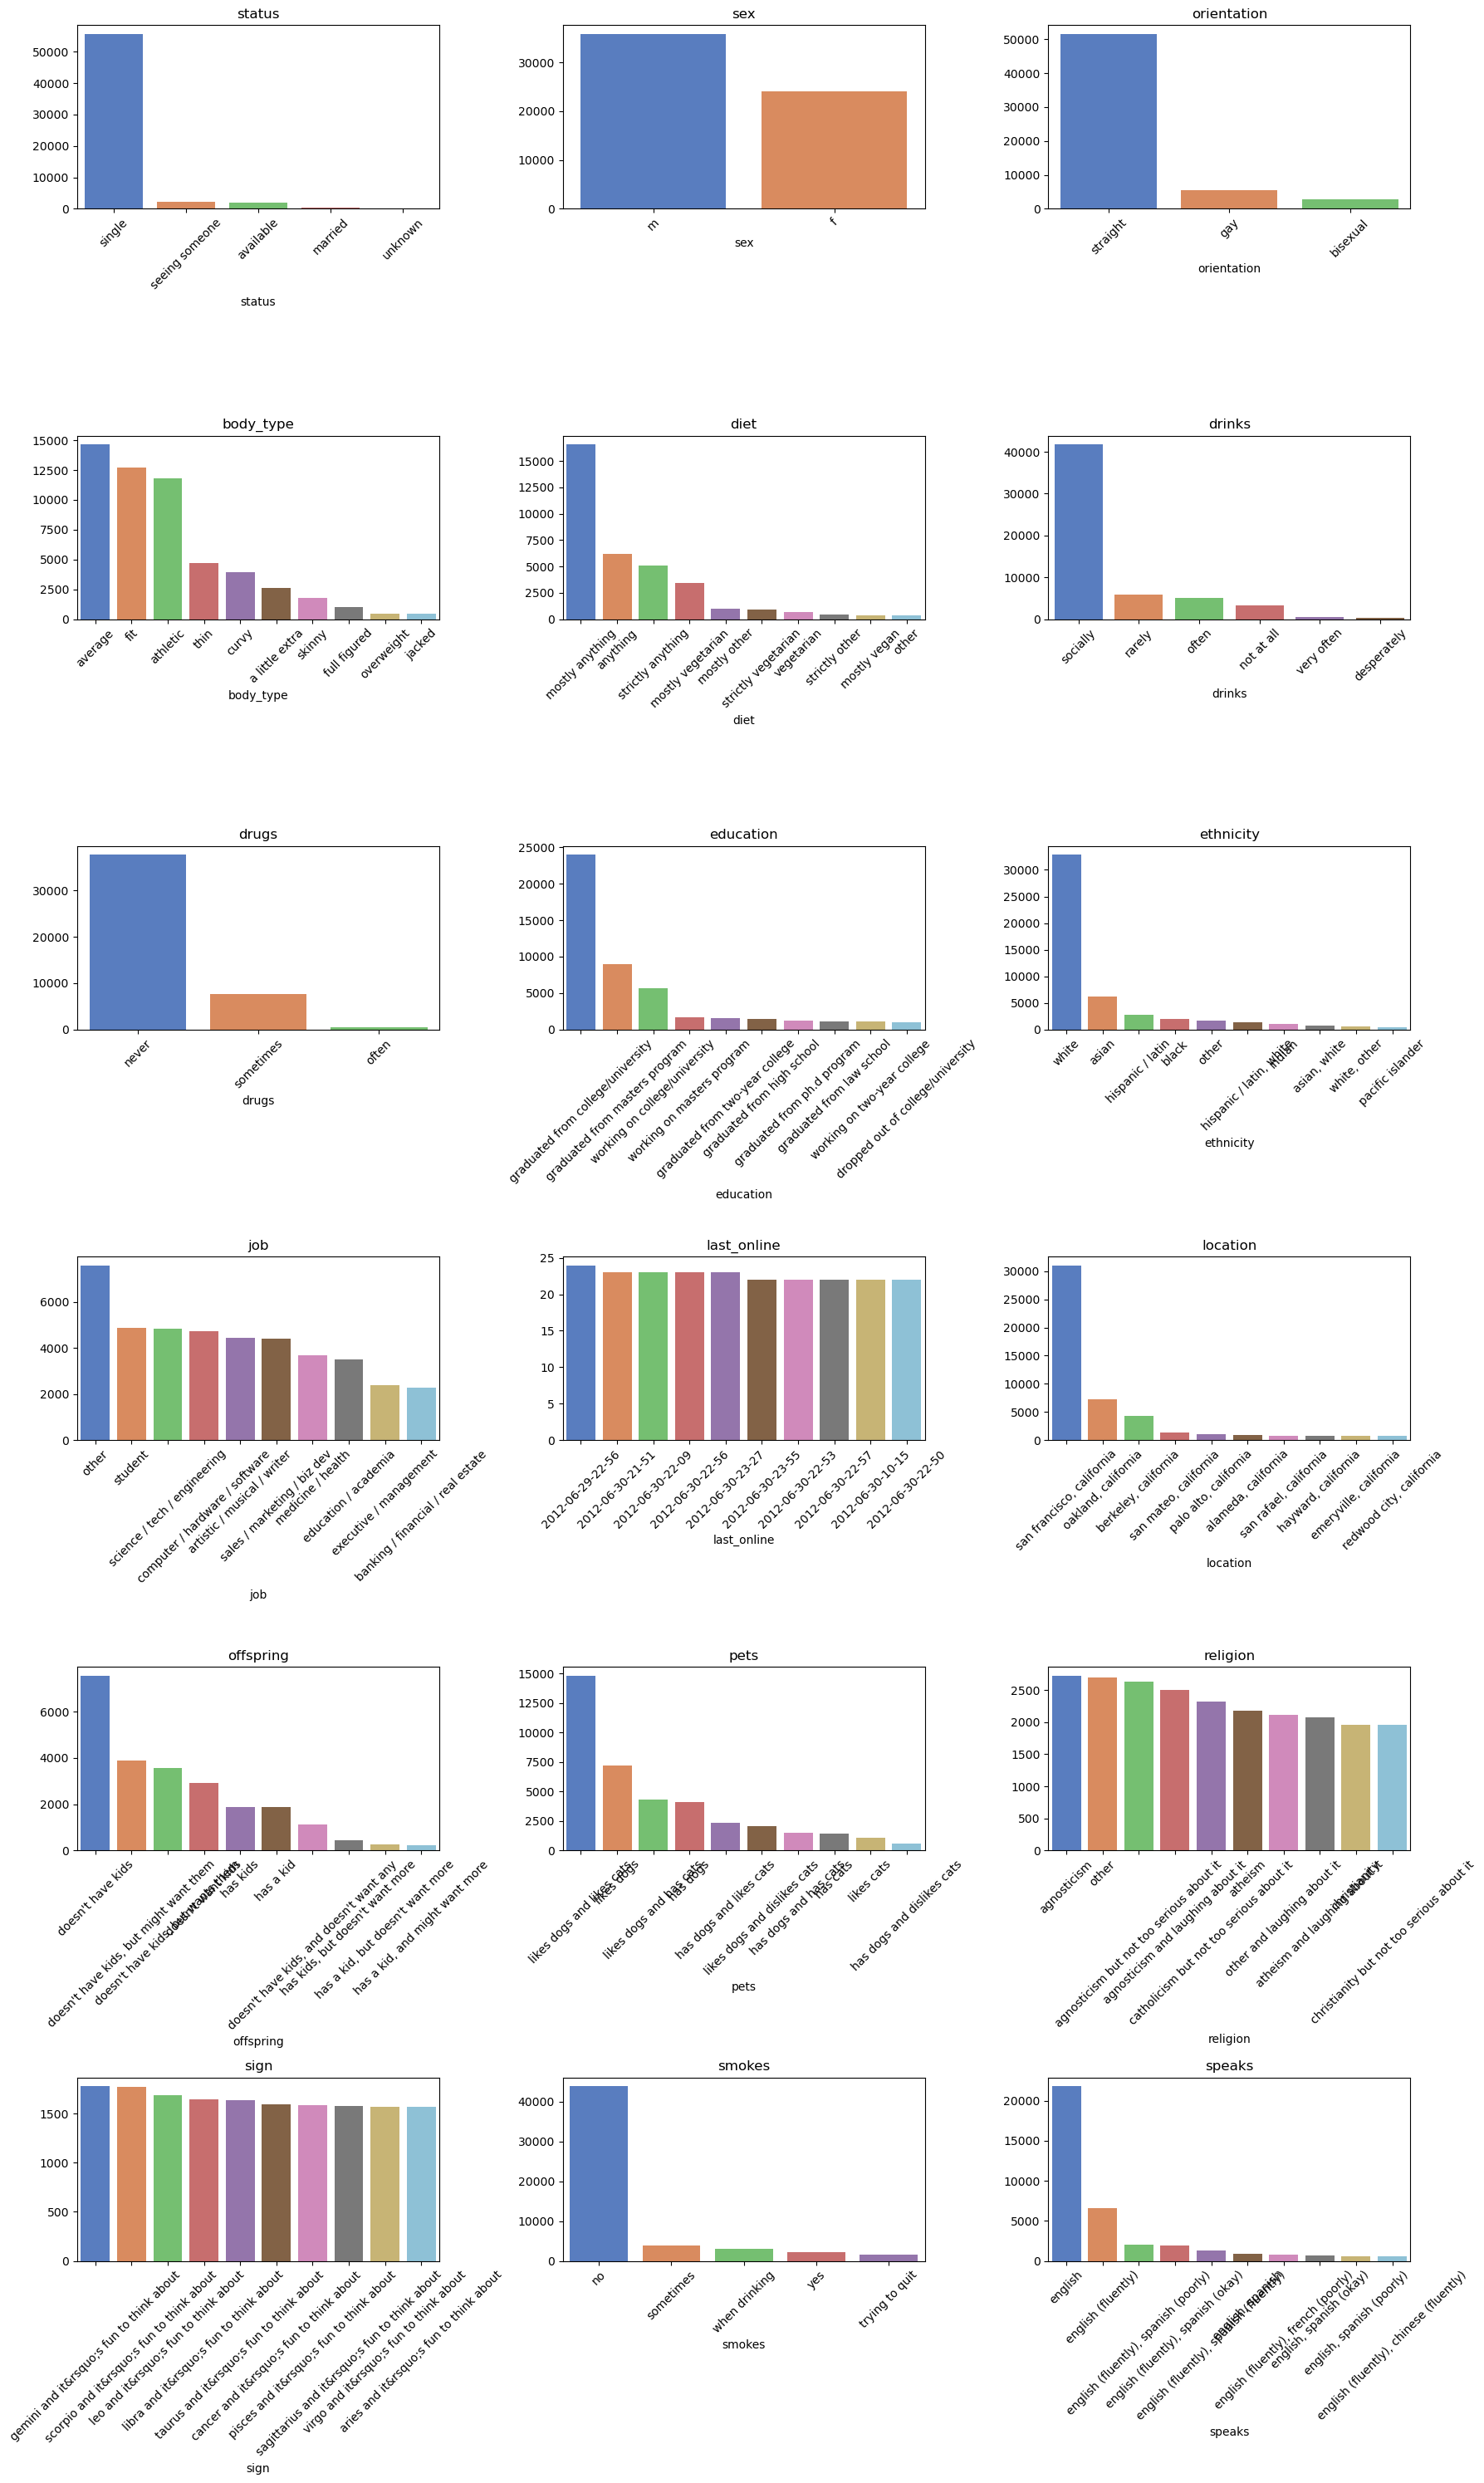

In [ ]:

num_cols = len(object_cols.columns)
rows = math.ceil(num_cols / 3)  # Create rows dynamically
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))  
axes = axes.flatten()

for i, column in enumerate(object_cols.columns):
    value_counts = object_cols[column].value_counts().head(10)  # Top 10 categories
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette="muted")
    axes[i].set_title(column)
    axes[i].set_xticklabels(value_counts.index, rotation=45)

plt.tight_layout()
plt.show()

#### My EDA

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


<Axes: xlabel='status'>

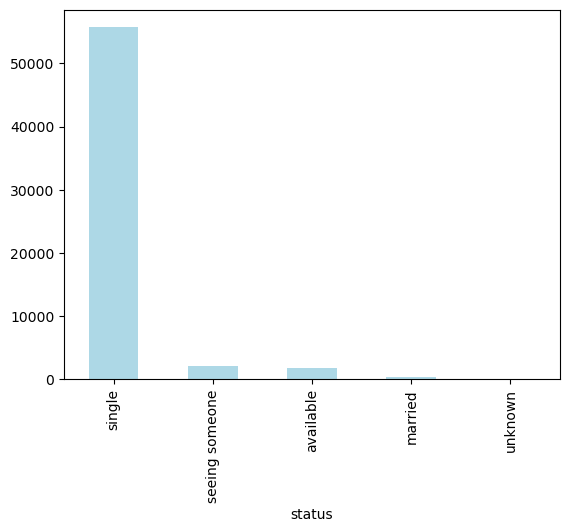

In [21]:
## Status
print(object_cols.status.value_counts())
object_cols.status.value_counts().plot(kind='bar', color='lightblue')

sex
m    35829
f    24117
Name: count, dtype: int64


<Axes: xlabel='sex'>

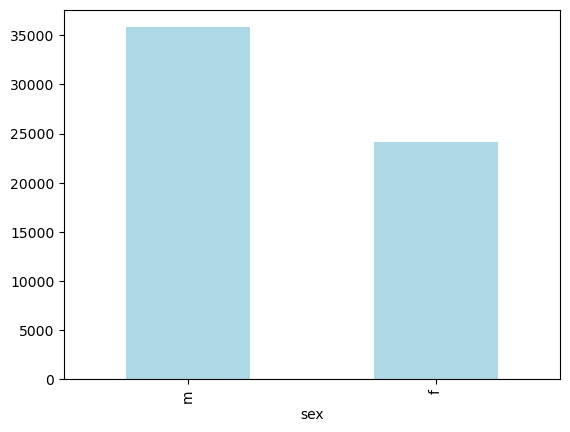

In [ ]:
## Sex
print(object_cols['sex'].value_counts())
object_cols['sex'].value_counts().plot(kind='bar', color='lightblue')

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64


<Axes: xlabel='orientation'>

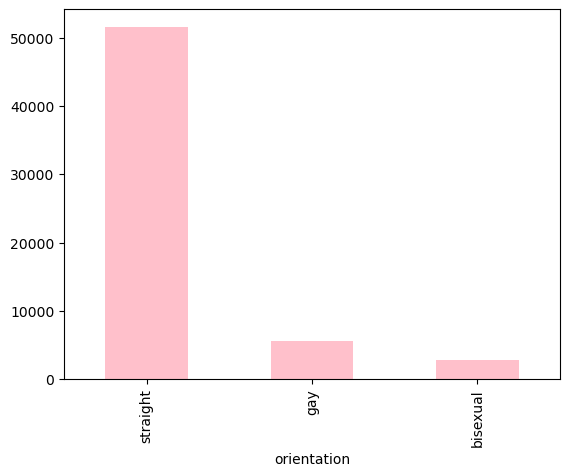

In [23]:
## Orientation
print(object_cols['orientation'].value_counts())
object_cols['orientation'].value_counts().plot(kind='bar', color='pink')

In [16]:
okc_features['body_type'].value_counts()

body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64